In [1]:
!pip install pandas matplotlib -q

In [2]:
%matplotlib notebook
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob

from IPython.core.display import display, Image, HTML
# import mpld3
# mpld3.enable_notebook()
plt.rcParams["figure.figsize"] = [10, 5]

In [3]:
csv_files = glob.glob('*.csv')

[2021-08-17_14-51-28_568385.csv]


<IPython.core.display.Javascript object>


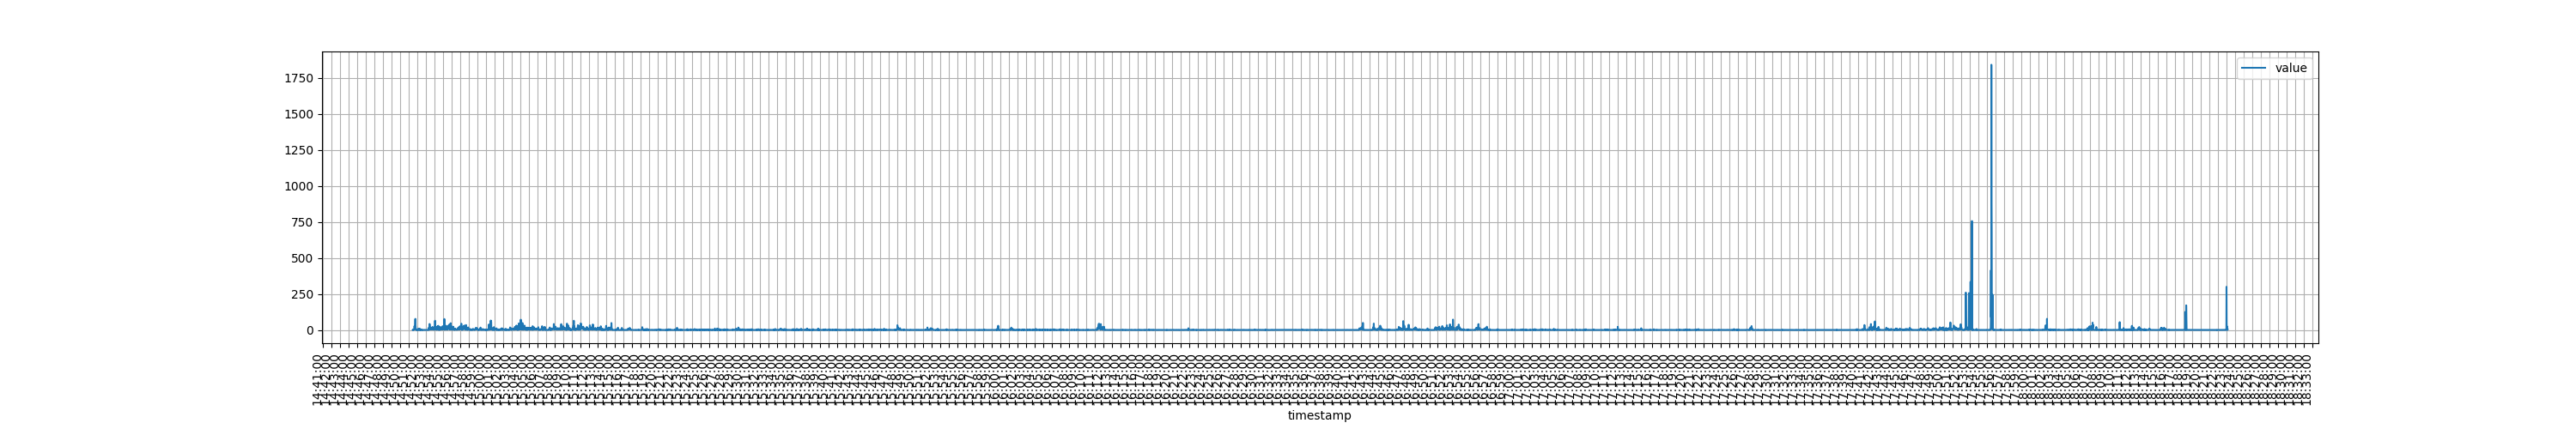

,value,time_index
timestamp,,
2021-08-17 14:51:28,0.625000,0.0
2021-08-17 14:51:29,2.136364,0.0
2021-08-17 14:51:30,0.681818,0.0
2021-08-17 14:51:31,0.173913,0.0
2021-08-17 14:51:32,0.130435,0.0
...,...,...
2021-08-17 18:23:02,1.086957,1269.0
2021-08-17 18:23:03,0.333333,1269.0
2021-08-17 18:23:04,0.416667,1269.0


[2021-08-17_16-50-21_433436.csv]


<IPython.core.display.Javascript object>


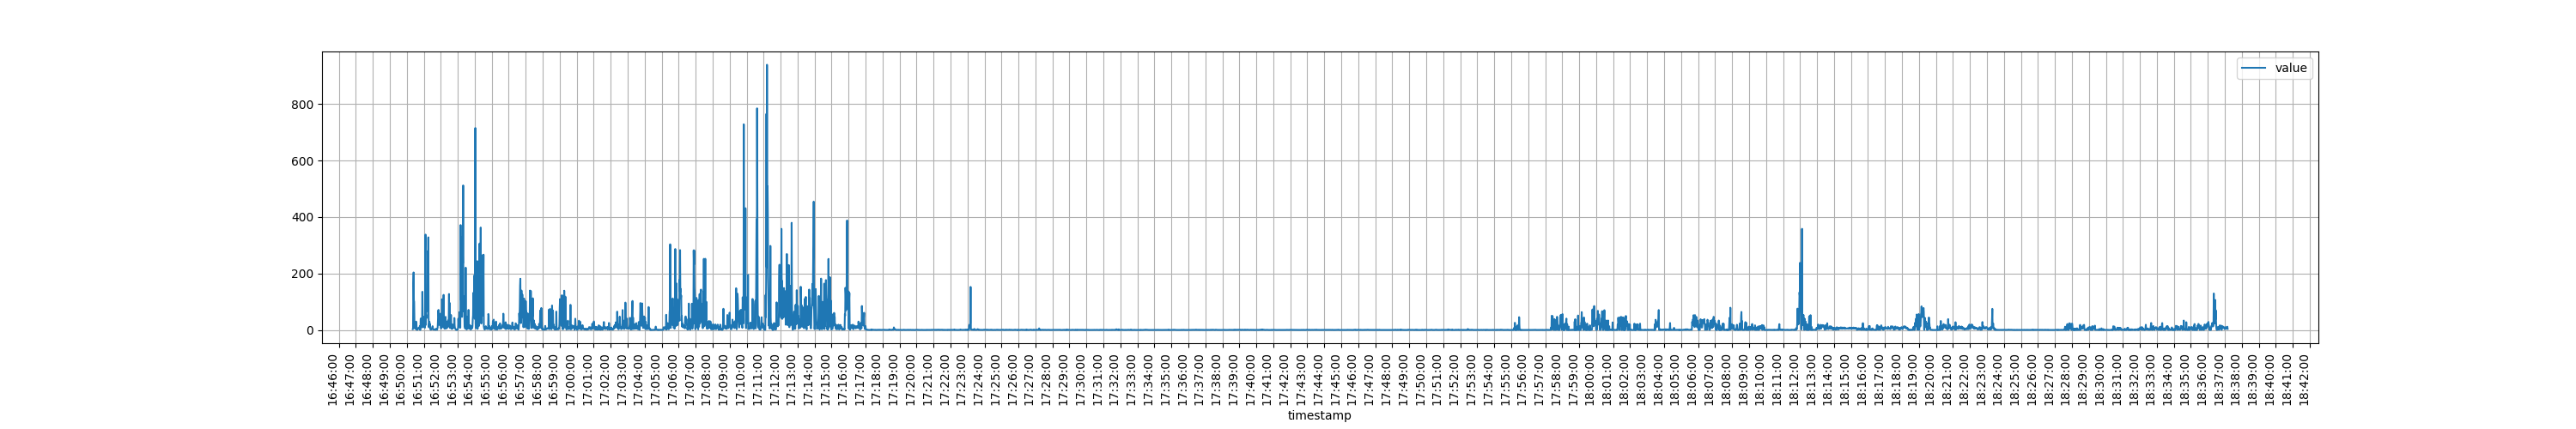

,value,time_index
timestamp,,
2021-08-17 16:50:21,2.727273,0.0
2021-08-17 16:50:22,5.083333,0.0
2021-08-17 16:50:23,165.000000,0.0
2021-08-17 16:50:24,203.565217,0.0
2021-08-17 16:50:25,104.434783,0.0
...,...,...
2021-08-17 18:37:06,8.571429,640.0
2021-08-17 18:37:07,4.827586,640.0
2021-08-17 18:37:08,10.678571,640.0


In [4]:
display(HTML("<style>div.output_scroll { height: unset; }</style>"))
for csv_filename in csv_files:
    print('[{}]'.format(csv_filename))
    df = pd.read_csv(csv_filename, names=["value", "time_index", "timestamp"])
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d_%H:%M:%S.%f')
    #df = df[1:]
    df = df[df['value'] < 10000] # exclude of obvious outliers
    df = df.set_index("timestamp")
    df = df.resample('1S').mean()
    _,ax = plt.subplots()
    ax = df.plot(ax=ax, x_compat=True, y='value', figsize=(30, 5), grid=True) # w, h
    ax.get_figure().savefig(csv_filename+".jpg")
    ax.xaxis.set_major_locator(mpl.dates.MinuteLocator())
    ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%H:%M:%S"))
    display(df)
    plt.xticks(rotation=90)
    plt.show()